<a href="https://colab.research.google.com/github/leandroleao2k/ImageML/blob/main/RegrasDeAssociacao%20Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como descobrir regras a priori com conjunto de items
## o algoritmo sera usado apriori do mlxtent

*   faz uma varredura no dataset e calcula o suporte de cada item
*   de forma iterativaverifica os k-itemsets, remove os nao frequentes 
*   varre o dataset novmente e calcula o suporte dos itemsets gerados 
* remove quem for abaixo de min_support




In [74]:
import numpy as np
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = [['bread', 'milk', 'eggs'],
           ['bread', 'milk', 'coke', 'fralda'],
           ['beer', 'coke'],
           ['beer', 'milk'],
           ['bread', 'milk', 'coke', 'fralda'],
           ['beer', 'coke'],
           ['beer', 'milk'],
           ['beer', 'milk'],
           ['beer', 'fralda'],
           ['beer',  'fralda', 'coke'],
           ['beer','bread', 'milk', 'eggs'],
           ['beer','bread', 'milk', 'eggs']]

## Transformação das transações

In [75]:
tenc = TransactionEncoder()
tenc.fit(dataset)
dataset_enc = tenc.transform(dataset)

# ver as propriedades
print('Propriedades ', tenc.columns_)
print(tenc.columns_mapping_)
print(dataset_enc.astype(int))
dataset_enc

Propriedades  ['beer', 'bread', 'coke', 'eggs', 'fralda', 'milk']
{'beer': 0, 'bread': 1, 'coke': 2, 'eggs': 3, 'fralda': 4, 'milk': 5}
[[0 1 0 1 0 1]
 [0 1 1 0 1 1]
 [1 0 1 0 0 0]
 [1 0 0 0 0 1]
 [0 1 1 0 1 1]
 [1 0 1 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 1 0]
 [1 1 0 1 0 1]
 [1 1 0 1 0 1]]


array([[False,  True, False,  True, False,  True],
       [False,  True,  True, False,  True,  True],
       [ True, False,  True, False, False, False],
       [ True, False, False, False, False,  True],
       [False,  True,  True, False,  True,  True],
       [ True, False,  True, False, False, False],
       [ True, False, False, False, False,  True],
       [ True, False, False, False, False,  True],
       [ True, False, False, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True,  True, False,  True, False,  True],
       [ True,  True, False,  True, False,  True]])

In [76]:
df = pd.DataFrame(dataset_enc, columns=tenc.columns_)
df

,beer,bread,coke,eggs,fralda,milk
0,False,True,False,True,False,True
1,False,True,True,False,True,True
2,True,False,True,False,False,False
3,True,False,False,False,False,True
4,False,True,True,False,True,True
5,True,False,True,False,False,False
6,True,False,False,False,False,True
7,True,False,False,False,False,True
8,True,False,False,False,True,False
9,True,False,True,False,True,False


## Gerando conjunto de items frequentes com apriori 
*  a poda é feita com base na confiança do min suporte

In [77]:
min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.750000,(beer)
1,0.666667,(milk)


### testando com 20% de min support

In [78]:
min_support = 0.2
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.750000,(beer)
1,0.416667,(bread)
2,0.416667,(coke)
3,0.250000,(eggs)
4,0.333333,(fralda)
5,0.666667,(milk)
6,0.250000,"(coke, beer)"
7,0.416667,"(beer, milk)"
8,0.250000,"(bread, eggs)"
9,0.416667,"(bread, milk)"


## Geração de regras de Associação
 2^k - 2 regras, sendo k items
voce vai ser o antecedente,  consequente e a confiança


In [79]:
regras = association_rules( frequent_itemsets, metric='support', min_threshold=0.0)
regras = regras.drop(columns=['lift', 'leverage', 'conviction'])
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(coke),(beer),0.416667,0.750000,0.250000,0.600000
1,(beer),(coke),0.750000,0.416667,0.250000,0.333333
2,(beer),(milk),0.750000,0.666667,0.416667,0.555556
3,(milk),(beer),0.666667,0.750000,0.416667,0.625000
4,(bread),(eggs),0.416667,0.250000,0.250000,0.600000
5,(eggs),(bread),0.250000,0.416667,0.250000,1.000000
6,(bread),(milk),0.416667,0.666667,0.416667,1.000000
7,(milk),(bread),0.666667,0.416667,0.416667,0.625000
8,(fralda),(coke),0.333333,0.416667,0.250000,0.750000
9,(coke),(fralda),0.416667,0.333333,0.250000,0.600000


### Filtra com threshold 30%

In [80]:
regras = association_rules( frequent_itemsets, metric='support', min_threshold=0.3)
regras = regras.drop(columns=['lift', 'leverage', 'conviction'])
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(beer),(milk),0.750000,0.666667,0.416667,0.555556
1,(milk),(beer),0.666667,0.750000,0.416667,0.625000
2,(bread),(milk),0.416667,0.666667,0.416667,1.000000
3,(milk),(bread),0.666667,0.416667,0.416667,0.625000


### Metrica Lift
 determina o fator de interesse de 0 ao infinito
 o lift checa a probabilidade da confidencia / suporte 
 * se lift = 1 então X e Y são independentes
 * se lift < 1 então X tem efeito negativo em Y
 * se lift > 1 então X e Y são frequentes e X é positivo sobre Y

 ### Leverage
 calcula a diferença da probabilidade da regra e a esperada se os itens forem estatisticamente independentes

 ### Convicção 
 checa se o item é altamente dependente do antecedente quando a convicção é alta
 ela é sensivel a direção da regra conviccao( X -> Y ) <> convição de ( Y -> X )
 


In [81]:
regras = association_rules( frequent_itemsets, metric='support', min_threshold=0.4)
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beer),(milk),0.750000,0.666667,0.416667,0.555556,0.833333,-0.083333,0.750000
1,(milk),(beer),0.666667,0.750000,0.416667,0.625000,0.833333,-0.083333,0.666667
2,(bread),(milk),0.416667,0.666667,0.416667,1.000000,1.500000,0.138889,inf
3,(milk),(bread),0.666667,0.416667,0.416667,0.625000,1.500000,0.138889,1.555556


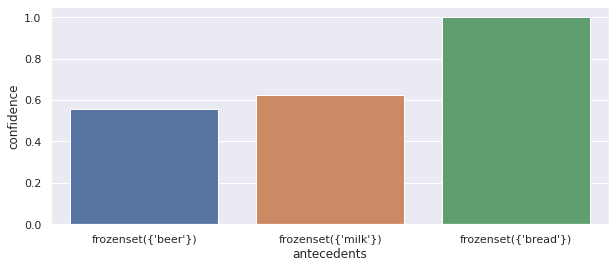

In [88]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,4)
sns.set(font_scale=1)
sns.barplot(x='antecedents', y='confidence', data=regras)

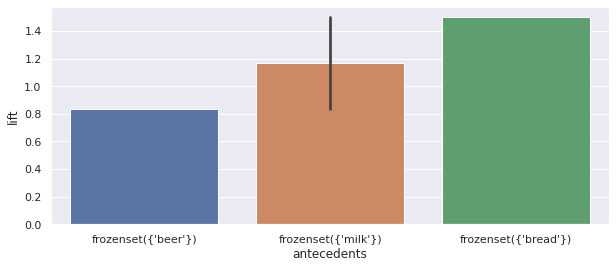

In [89]:
sns.barplot(x='antecedents', y='lift', data=regras)

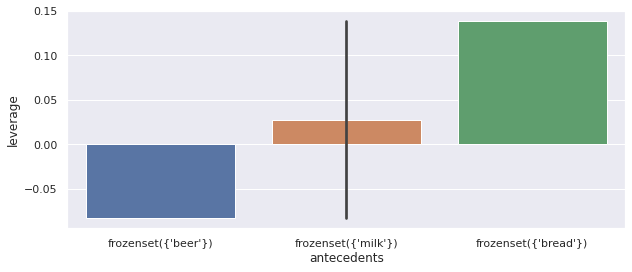

In [90]:
sns.barplot(x='antecedents', y='leverage', data=regras)

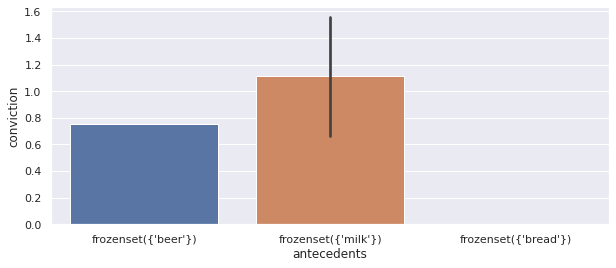

In [91]:
sns.barplot(x='antecedents', y='conviction', data=regras)